# Stable Cascase - LLaVA image analysis

## Jupyter Notebook Setup

In [1]:
%pip install --upgrade --quiet  langchain langchain_community langchain_core


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install --upgrade --quiet pillow ExifRead hachoir


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### Enable LangSmith

In [3]:
import os
import uuid, datetime

uid = uuid.uuid4().hex[:6]
current_time = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

project_name = f"ollama_image_classification_{current_time}"
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]=project_name

## Image Summarization function

In [4]:
import base64

from langchain_core.messages import HumanMessage
from langchain_community.chat_models import ChatOllama

def image_summarize(img_base64: str, prompt: str) -> str:
    """Generate a summary for the given image and prompt using ChatOllama."""
    if not img_base64:
        return "Error: Base64 image data is required."

    try:
        chat = ChatOllama(model="llava-phi3")
        image_url = f"data:image/jpeg;base64,{img_base64}"
        msg = chat.invoke([
            HumanMessage(
                content=[
                    {"type": "text", "text": prompt},
                    {"type": "image_url", "image_url": image_url},
                ]
            )
        ])
        return msg.content
    except Exception as e:
        return f"Error: Failed to generate summary due to {e}"

### Image Summarization Prompt

In [5]:
analysis_prompt_text = """
Objective: You are a curator of fine art.  Describe the image using the provided standardized JSON output structure.

Output Structure:

```json
{
  "imageType": "Category",
  "visualInspectionSummary": "Summary of the primary visual content.",
  "contextualClues": "Noted context-specific elements.",
  "intendedAudience": "Speculated audience.",
  "initialInterpretation": "Brief interpretation of the image content.",
  "specialAttentionElements": "Elements needing special attention.",
  "recommendedForDetailedAnalysis": true/false,
  "additionalDetails": {
    "potentialConcerns": "Any potential concerns for detailed analysis.",
    "comparativeAnalysis": "Comparative notes if applicable."
  }
}
```

Guidelines for Analysis:

- Ensure all fields are included in every output, using `null` or `"N/A"` for non-applicable sections.
- Adhere to the uniform naming conventions and predefined categories.
- Provide clear, concise descriptions and summaries to facilitate easy understanding and processing by downstream systems.
- Conduct automated validation checks to confirm adherence to the standardized format before submission.
"""

## First image


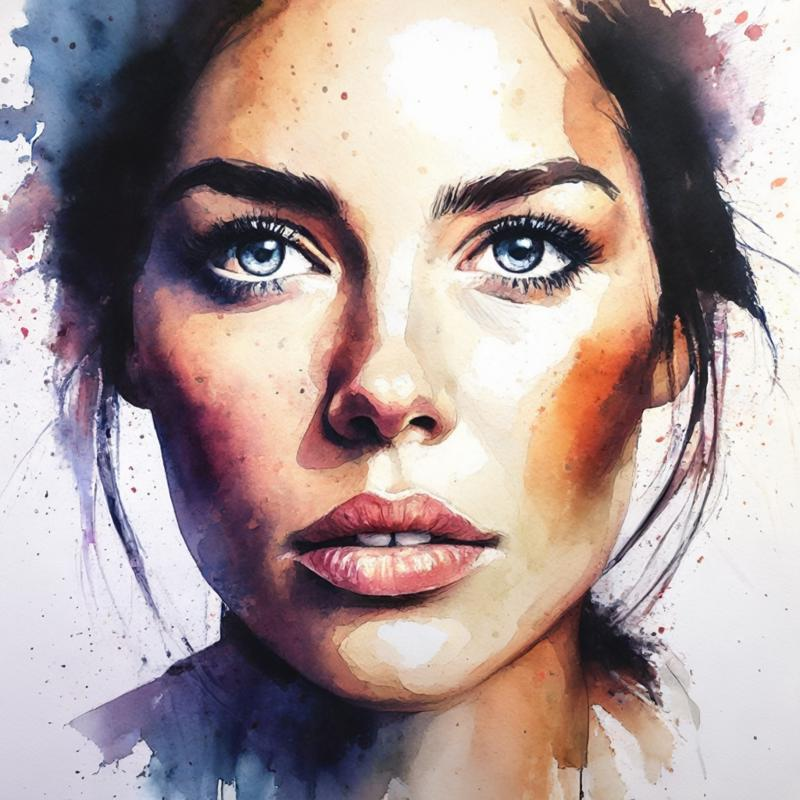

In [6]:
import image_tools
from IPython.display import display, HTML

image_url = "https://image.civitai.com/xG1nkqKTMzGDvpLrqFT7WA/1b46a05f-150c-407b-a7b9-59c1ffe44196/width=700/ComfyUI_00012_.jpeg"

encoded_image = image_tools.encode_image_from_url(image_url)

display(HTML(image_tools.display_base64_image(encoded_image)))


#### Image Metadata

In [7]:
pil_metadata = image_tools.extract_pil_metadata(encoded_image)
exifread_metadata = image_tools.extract_exifread_metadata(encoded_image)
hachoir_metadata = image_tools.extract_hachoir_metadata(encoded_image)

print("----------------------------------") 
print(pil_metadata)

print("----------------------------------")
print(exifread_metadata)

print("----------------------------------")
print(hachoir_metadata)

[warn] Skip parser 'FAT12': Invalid FAT12 signature
[warn] Skip parser 'FAT16': Invalid FAT16 signature
[warn] Skip parser 'FAT32': Invalid FAT32 signature
[warn] Skip parser 'LinuxSwapFile': Unknown magic string
[warn] Skip parser 'MSDos_HardDrive': Invalid signature
[warn] Skip parser 'PIFVFile': Invalid magic number
[warn] Skip parser 'ElfFile': Invalid magic
[warn] Skip parser 'MachoFatFile': Invalid magic
[warn] Skip parser 'MachoFile': Invalid magic
[warn] Skip parser 'PRCFile': False


----------------------------------
{'PIL': {'width': 800, 'height': 800, 'format': 'JPEG', 'exif': None}}
----------------------------------
{'ExifRead': {}}
----------------------------------
{'Hachoir': ['Metadata:', '- Image width: 800 pixels', '- Image height: 800 pixels', '- Bits/pixel: 24', '- Pixel format: YCbCr', '- Image DPI width: 96 DPI', '- Image DPI height: 96 DPI', '- Compression: JPEG (Baseline)', '- Comment: JPEG quality: 75%', '- Format version: JFIF 1.01', '- MIME type: image/jpeg', '- Endianness: Big endian']}


#### Image Analysis

In [8]:
analysis_result = image_summarize(encoded_image, analysis_prompt_text)
print(analysis_result)

```json
{
  "imageType": "Face Painting",
  "visualInspectionSummary": "An impressionistic painting of a woman's face with watercolor-like textures.",
  "contextualClues": "The artwork appears to be done in an impressionistic style, resembling the use of watercolors. The subject is a woman's face, but specific identifiers or symbols are not present.",
  "intendedAudience": "General public",
  "initialInterpretation": "This painting captures a sense of the human condition through its impressionistic portrayal of a woman's face. The use of watercolor-like textures adds depth and emotion to the piece, inviting viewers to ponder their own interpretations.",
  "specialAttentionElements": null,
  "recommendedForDetailedAnalysis": true,
  "additionalDetails": {
    "potentialConcerns": "The artwork may contain sensitive or personal elements that require careful consideration when presenting it to a wider audience.",
    "comparativeAnalysis": null
  }
}
```


## Second Image


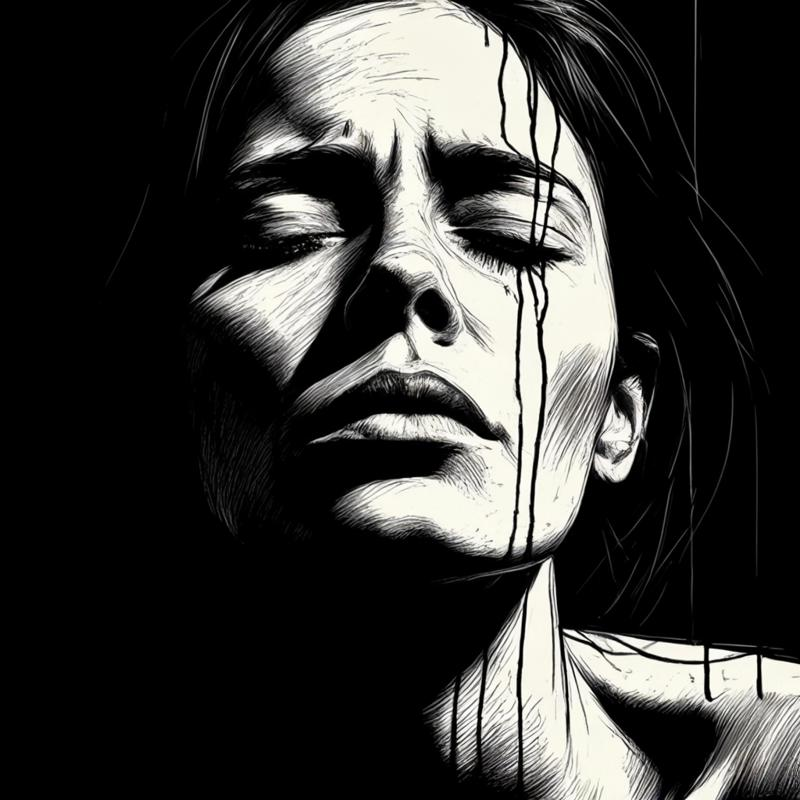

In [9]:
import image_tools
from IPython.display import display, HTML

image_url = "https://image.civitai.com/xG1nkqKTMzGDvpLrqFT7WA/a060a3a5-4f04-46ca-9d62-3f38bd145088/width=700/ComfyUI_00014_.jpeg"

encoded_image = image_tools.encode_image_from_url(image_url)

display(HTML(image_tools.display_base64_image(encoded_image)))


#### Image Metadata

In [10]:
pil_metadata = image_tools.extract_pil_metadata(encoded_image)
exifread_metadata = image_tools.extract_exifread_metadata(encoded_image)
hachoir_metadata = image_tools.extract_hachoir_metadata(encoded_image)

print("----------------------------------") 
print(pil_metadata)

print("----------------------------------")
print(exifread_metadata)

print("----------------------------------")
print(hachoir_metadata)

[warn] Skip parser 'FAT12': Invalid FAT12 signature
[warn] Skip parser 'FAT16': Invalid FAT16 signature
[warn] Skip parser 'FAT32': Invalid FAT32 signature
[warn] Skip parser 'LinuxSwapFile': Unknown magic string
[warn] Skip parser 'MSDos_HardDrive': Invalid signature
[warn] Skip parser 'PIFVFile': Invalid magic number
[warn] Skip parser 'ElfFile': Invalid magic
[warn] Skip parser 'MachoFatFile': Invalid magic
[warn] Skip parser 'MachoFile': Invalid magic
[warn] Skip parser 'PRCFile': False


----------------------------------
{'PIL': {'width': 800, 'height': 800, 'format': 'JPEG', 'exif': None}}
----------------------------------
{'ExifRead': {}}
----------------------------------
{'Hachoir': ['Metadata:', '- Image width: 800 pixels', '- Image height: 800 pixels', '- Bits/pixel: 24', '- Pixel format: YCbCr', '- Image DPI width: 96 DPI', '- Image DPI height: 96 DPI', '- Compression: JPEG (Baseline)', '- Comment: JPEG quality: 75%', '- Format version: JFIF 1.01', '- MIME type: image/jpeg', '- Endianness: Big endian']}


#### Image Analysis

In [11]:
analysis_result = image_summarize(encoded_image, analysis_prompt_text)
print(analysis_result)

```json
{
  "imageType": "Monochrome",
  "visualInspectionSummary": "A face with closed eyes, forehead wrinkles, and tears. The image is black and white.",
  "contextualClues": "The person appears to be in a state of sadness or contemplation.",
  "intendedAudience": "Art enthusiasts, critics, and general viewers interested in fine art.",
  "initialInterpretation": "This image depicts a human face in a moment of introspection or emotional distress.",
  "specialAttentionElements": ["forehead wrinkles", "tears"],
  "recommendedForDetailedAnalysis": true,
  "additionalDetails": {
    "potentialConcerns": "The image may evoke strong emotions in viewers and thus should be handled with care by those who create or analyze such works.",
    "comparativeAnalysis": null
  }
}
```


## Third Image


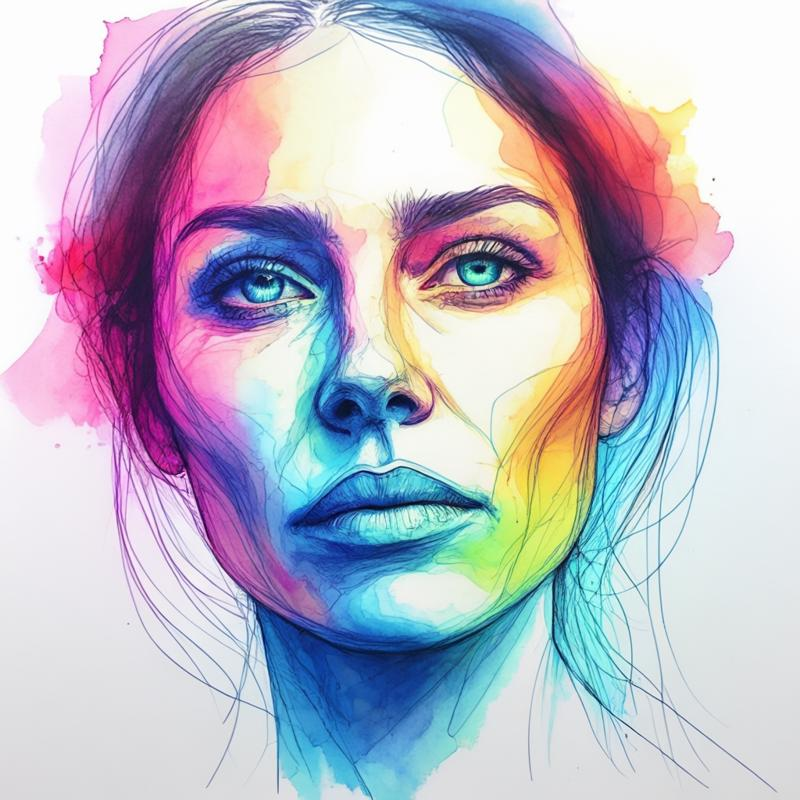

In [12]:
import image_tools
from IPython.display import display, HTML

image_url = "https://image.civitai.com/xG1nkqKTMzGDvpLrqFT7WA/638933d4-aa15-44eb-857f-a33ad55b8ce1/width=700/ComfyUI_00004_.jpeg"

encoded_image = image_tools.encode_image_from_url(image_url)

display(HTML(image_tools.display_base64_image(encoded_image)))


#### Image Metadata

In [13]:
pil_metadata = image_tools.extract_pil_metadata(encoded_image)
exifread_metadata = image_tools.extract_exifread_metadata(encoded_image)
hachoir_metadata = image_tools.extract_hachoir_metadata(encoded_image)

print("----------------------------------") 
print(pil_metadata)

print("----------------------------------")
print(exifread_metadata)

print("----------------------------------")
print(hachoir_metadata)

[warn] Skip parser 'FAT12': Invalid FAT12 signature
[warn] Skip parser 'FAT16': Invalid FAT16 signature
[warn] Skip parser 'FAT32': Invalid FAT32 signature
[warn] Skip parser 'LinuxSwapFile': Unknown magic string
[warn] Skip parser 'MSDos_HardDrive': Invalid signature
[warn] Skip parser 'PIFVFile': Invalid magic number
[warn] Skip parser 'ElfFile': Invalid magic
[warn] Skip parser 'MachoFatFile': Invalid magic
[warn] Skip parser 'MachoFile': Invalid magic
[warn] Skip parser 'PRCFile': False


----------------------------------
{'PIL': {'width': 800, 'height': 800, 'format': 'JPEG', 'exif': None}}
----------------------------------
{'ExifRead': {}}
----------------------------------
{'Hachoir': ['Metadata:', '- Image width: 800 pixels', '- Image height: 800 pixels', '- Bits/pixel: 24', '- Pixel format: YCbCr', '- Image DPI width: 96 DPI', '- Image DPI height: 96 DPI', '- Compression: JPEG (Baseline)', '- Comment: JPEG quality: 75%', '- Format version: JFIF 1.01', '- MIME type: image/jpeg', '- Endianness: Big endian']}


#### Image Analysis

In [14]:
analysis_result = image_summarize(encoded_image, analysis_prompt_text)
print(analysis_result)

```json
{
  "imageType": "Illustration",
  "visualInspectionSummary": "A woman's face in a portrait, with blue and pink watercolor-like colors. The woman has blue eyes.",
  "contextualClues": null,
  "intendedAudience": null,
  "initialInterpretation": "An illustration of a woman with blue eyes and a multicolored face, possibly representing an emotional or expressive state.",
  "specialAttentionElements": {
    "eyes": "The woman's blue eyes are the most striking feature in this illustration."
  },
  "recommendedForDetailedAnalysis": true,
  "additionalDetails": {
    "potentialConcerns": "The use of watercolor-like colors may be intended to convey a certain mood or atmosphere. It's important to consider the context in which this image was created.",
    "comparativeAnalysis": null
  }
}
```
